In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [72]:
data_sucio = pd.read_csv('ChinaData.csv')
data_sucio.head(5)

,id,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_accuracy,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,city scrape,304876,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,...,19/06/2011,13/02/2024,4.47,4.40,f,6,2,4,0,1.92
1,248140,previous scrape,1300549,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,...,30/10/2011,06/12/2024,4.90,4.91,f,1,1,0,0,1.37
2,263081,city scrape,1370155,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,274589,city scrape,1435069,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,...,16/12/2011,02/11/2024,4.77,4.76,f,1,1,0,0,1.90
4,280746,city scrape,1443229,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,...,21/04/2012,06/12/2024,4.25,4.20,t,2,2,0,0,0.36


In [73]:
data_sucio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6718 non-null   int64  
 1   source                                        6718 non-null   object 
 2   host_id                                       6718 non-null   int64  
 3   host_name                                     6718 non-null   object 
 4   host_since                                    6718 non-null   object 
 5   host_location                                 4431 non-null   object 
 6   host_response_time                            6401 non-null   object 
 7   host_response_rate                            6401 non-null   object 
 8   host_acceptance_rate                          6475 non-null   object 
 9   host_is_superhost                             6641 non-null   o

## Limpieza de Datos Nulos

In [74]:
data_cuanti=data_sucio.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data_sucio.select_dtypes(include=["object","datetime","category","datetime64[ns]"])

cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuanti.fillna(method="ffill")

data_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data_sin_nulos

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6748\1522788352.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6748\1522788352.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuanti.fillna(method="ffill")


,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,304876,59,6,1.0,2.0,3.0,28,1125,28,...,316,3,0,4.47,4.40,6,2,4,0,1.92
1,248140,1300549,1,2,1.2,1.0,1.6,30,150,30,...,220,23,2,4.90,4.91,1,1,0,0,1.37
2,263081,1370155,1,8,2.5,3.0,6.0,10,30,10,...,0,0,0,4.90,4.91,1,0,1,0,1.37
3,274589,1435069,1,4,1.0,2.0,3.0,28,365,3,...,302,28,0,4.77,4.76,1,1,0,0,1.90
4,280746,1443229,19,6,2.0,3.0,3.0,3,365,3,...,56,10,1,4.25,4.20,2,2,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1305922079484820904,4209137,38,6,1.0,2.0,3.0,1,365,1,...,0,0,0,5.00,5.00,34,14,19,1,1.00
6714,1306173025771347835,57341318,1,2,1.0,1.0,1.0,1,365,1,...,0,0,0,5.00,5.00,1,1,0,0,1.00
6715,1306185405897992592,667730514,1,2,1.0,1.0,1.0,1,14,1,...,0,0,0,5.00,5.00,1,1,0,0,1.00
6716,1306203936024566574,280827591,1,1,1.0,1.0,1.0,1,365,1,...,0,0,0,5.00,5.00,1,0,1,0,1.00


In [75]:
data=data_sin_nulos.isnull().sum().sum()
print(data)

0


In [76]:
cuantitativas=data_sucio.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data_sucio.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,source,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,city scrape,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,Central,"['email', 'phone']",...,316,3,0,NaN,NaN,6,2,4,0,1.92
1,previous scrape,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,Sheung Wan,"['email', 'phone']",...,220,23,2,NaN,NaN,1,1,0,0,1.37
2,city scrape,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,The Peak,"['email', 'phone', 'work_email']",...,0,0,0,NaN,NaN,1,0,1,0,0.90
3,city scrape,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,Wan Chai,"['email', 'phone']",...,302,28,0,NaN,NaN,1,1,0,0,1.90
4,city scrape,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,Stanley,"['email', 'phone']",...,56,10,1,NaN,NaN,2,2,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,city scrape,Cherry,21/11/2012,Hong Kong,within an hour,100%,98%,f,Wan Chai,"['email', 'phone']",...,0,0,0,NaN,NaN,34,14,19,1,0.90
6714,city scrape,Edwin,04/02/2016,Hong Kong,NaN,NaN,NaN,f,Mid-Levels,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6715,city scrape,James John,19/12/2024,NaN,NaN,NaN,NaN,f,Wong Chuk Hang,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6716,city scrape,Iryna,31/07/2019,NaN,NaN,NaN,NaN,f,Sai Wan,['phone'],...,0,0,0,NaN,NaN,1,0,1,0,0.90


In [77]:
cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")
cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))

data = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6748\2201947038.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6748\2201947038.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")


,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,first_review,last_review,instant_bookable
0,103760,304876,59,6,1.0,2.0,3.0,28,1125,28,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Self check-in"", ""Wifi"", ""AC - split type duc...","$1,120.00",19/06/2011,13/02/2024,f
1,248140,1300549,1,2,1.2,1.0,1.6,30,150,30,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Hot water kettle"", ""Wifi"", ""Room-darkening s...","$1,120.00",30/10/2011,06/12/2024,f
2,263081,1370155,1,8,2.5,3.0,6.0,10,30,10,...,"Mid-level, Hong Kong",Central & Western,Private room in rental unit,Private room,2.5 baths,"[""Elevator"", ""Children\u2019s dinnerware"", ""Ex...","$22,215.00",30/10/2011,06/12/2024,f
3,274589,1435069,1,4,1.0,2.0,3.0,28,365,3,...,"Mid-level, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Wifi"", ""Clothing storage: wardrobe""...","$1,477.00",16/12/2011,02/11/2024,f
4,280746,1443229,19,6,2.0,3.0,3.0,3,365,3,...,"Mid-level, Hong Kong",Yuen Long,Entire rental unit,Entire home/apt,2 baths,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,011.00",21/04/2012,06/12/2024,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1305922079484820904,4209137,38,6,1.0,2.0,3.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,767.00",22/12/2024,22/12/2024,f
6714,1306173025771347835,57341318,1,2,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""First aid kit"", ""Carbon monoxide ala...",$626.00,22/12/2024,22/12/2024,f
6715,1306185405897992592,667730514,1,2,1.0,1.0,1.0,1,14,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Southern,Entire rental unit,Entire home/apt,1 bath,"[""TV"", ""Washer"", ""Wifi"", ""Pets allowed"", ""Dedi...",$528.00,22/12/2024,22/12/2024,t
6716,1306203936024566574,280827591,1,1,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Private room in rental unit,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Dedicated workspace"", ""Pai...",$455.00,22/12/2024,22/12/2024,f


In [78]:
outliers_limpios=data.isnull().sum().sum()
print(outliers_limpios)

0


In [ ]:
Corr_Factors=Entire_homeapt.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_EHA=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_EHA

## Analizar la correlación que existe en cada tipo de habitación respecto a las variables

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
room_types = data['room_type'].unique()
room_types

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [81]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '').astype(float)
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '').astype(float)
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [82]:
#host_acceptance_rate vs host_response_rate
#Entire home/apt
entire = data[data['room_type'] == 'Entire home/apt']

vars_indep = entire[['host_acceptance_rate']] #doble corchete porque pueden ser mas de una variable 
var_dep = entire['host_response_rate'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.15342638788784013
Coeficiende de Correlación:  0.3916968060730648


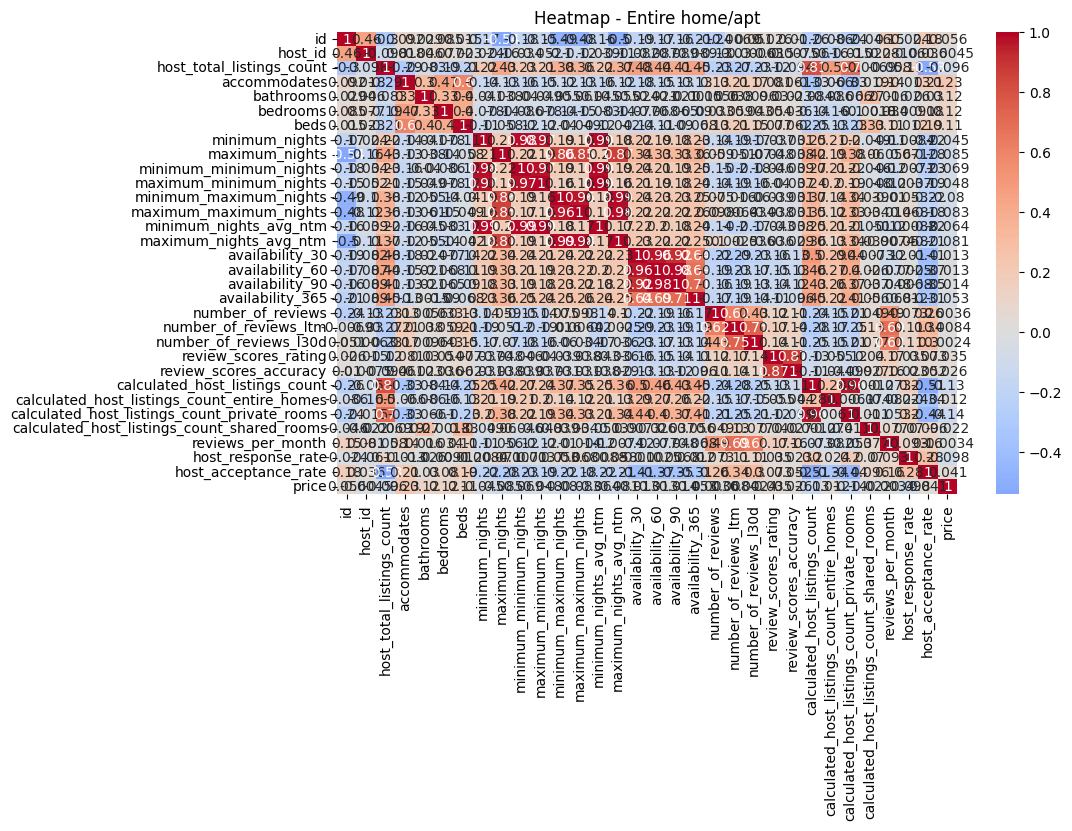

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap - Entire home/apt")
plt.show()

In [83]:
#host_acceptance_rate vs host_response_rate
#Private room
private = data[data['room_type'] == 'Private room']

vars_indep = private[['host_acceptance_rate']] #doble corchete porque pueden ser mas de una variable 
var_dep = private['host_response_rate'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.03283652748080512
Coeficiende de Correlación:  0.18120851933837195


In [84]:
#host_acceptance_rate vs host_response_rate
#Shared room
shared = data[data['room_type'] == 'Shared room']

vars_indep = shared[['host_acceptance_rate']] #doble corchete porque pueden ser mas de una variable 
var_dep = shared['host_response_rate'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.22141128145640043
Coeficiende de Correlación:  0.47054360207785256


In [85]:
#host_acceptance_rate vs host_response_rate
#Hotel room
hotel = data[data['room_type'] == 'Hotel room']

vars_indep = hotel[['host_acceptance_rate']] #doble corchete porque pueden ser mas de una variable 
var_dep = hotel['host_response_rate'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.05032648043852361
Coeficiende de Correlación:  0.2243356423721465


In [86]:
room_types = data['room_type'].unique()
room_types

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [87]:
#review_scores_location vs review_scores_cleanliness fue sustituida porque no las tenía incluídas en mi base de datos

#reviews_per_month vs review_scores_accuracy
#Entire home/apt
entire = data[data['room_type'] == 'Entire home/apt']

vars_indep = entire[['reviews_per_month']] #doble corchete porque pueden ser mas de una variable 
var_dep = entire['review_scores_accuracy'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.01596748735421949
Coeficiende de Correlación:  0.12636252353534053


In [88]:
#review_scores_location vs review_scores_cleanliness fue sustituida porque no las tenía incluídas en mi base de datos

#reviews_per_month vs review_scores_accuracy
#Private room
private = data[data['room_type'] == 'Private room']

vars_indep = private[['reviews_per_month']] #doble corchete porque pueden ser mas de una variable 
var_dep = private['review_scores_accuracy'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.03469117769851948
Coeficiende de Correlación:  0.1862556782987286


In [105]:
#review_scores_location vs review_scores_cleanliness fue sustituida porque no las tenía incluídas en mi base de datos

#reviews_per_month vs review_scores_accuracy
#Shared room
shared = data[data['room_type'] == 'Shared room']

vars_indep = shared[['reviews_per_month']] #doble corchete porque pueden ser mas de una variable 
var_dep = shared['review_scores_accuracy'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.024112958793300332
Coeficiende de Correlación:  0.1552834788163259


In [106]:
#review_scores_location vs review_scores_cleanliness fue sustituida porque no las tenía incluídas en mi base de datos

#reviews_per_month vs review_scores_accuracy
#Hotel room
hotel = data[data['room_type'] == 'Hotel room']

vars_indep = hotel[['reviews_per_month']] #doble corchete porque pueden ser mas de una variable 
var_dep = hotel['review_scores_accuracy'] #una sola variable, no doble corchete

model = LinearRegression()
model.fit(X=vars_indep, y=var_dep) #X mayúscula porque es matriz, no vector
model.__dict__

coef_Deter =model.score(X=vars_indep, y=var_dep)
print("Coeficiende de Determinación: ",coef_Deter)

coef_Corr = np.sqrt(coef_Deter)
print("Coeficiende de Correlación: ", coef_Corr)

Coeficiende de Determinación:  0.001229154441147906
Coeficiende de Correlación:  0.035059298925504856


In [90]:
#host_acceptance_rate vs price

In [91]:
#availability_365 vs number_of_reviews

In [92]:
#host_acceptance_rate vs number_of_reviews

In [93]:
#reviews_per_month vs review_scores_communication

## Crear el modelo matemático con la mayor correlación para cada tipo de alojamiento elegido

## Realizar una tabla de los 10 coeficientes de determinación y correlación mas altos, obtenidos para cada tipo de habitación elegido.

## Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa, y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.

In [94]:
#host_id 

In [95]:
#host_acceptance_rate

In [96]:
#host_is_superhost

In [97]:
#host_total_listings_count

In [98]:
#room_type

In [99]:
#accommodates

In [100]:
#bedrooms

In [101]:
#Price

In [102]:
#review_scores_value

In [103]:
#reviews_per_month

## Comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor